<a href="https://colab.research.google.com/github/Mounika-Alwar/ML-Practice/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Isolation Forest to detect anomalies in a dataset with outliers. Visualize the decision function vs normal data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

In [2]:
X, _ = make_blobs(n_samples=300, centers=[[0,0]], cluster_std=0.5, random_state=42)

# Adding some outliers
np.random.seed(42)
outliers = np.random.uniform(low=-6, high=6, size=(20,2))
X = np.vstack([X, outliers])

In [3]:
iso_forest = IsolationForest(contamination=0.06, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.06, random_state=42)

In [4]:
y_pred = iso_forest.predict(X)

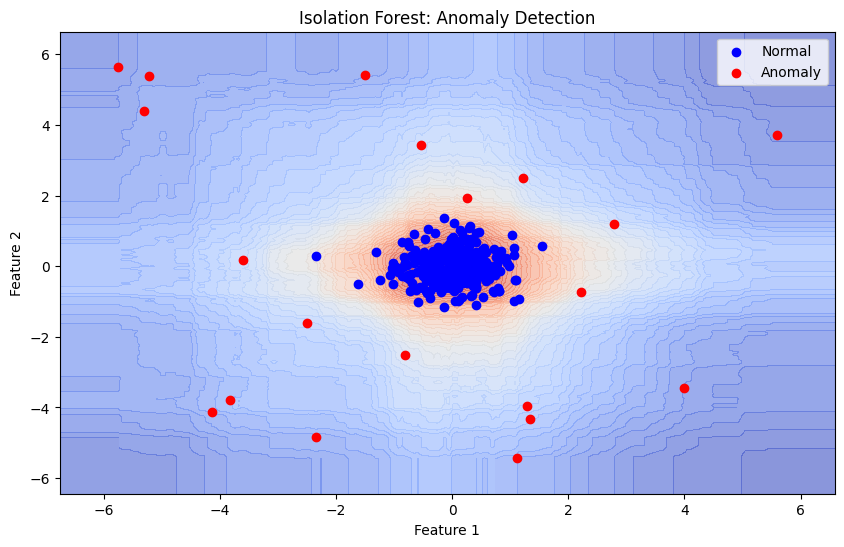

In [5]:
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.6)
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='blue', label='Normal')
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c='red', label='Anomaly')
plt.title("Isolation Forest: Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()